In [1]:
import gymnasium as gym
import time

In [2]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')

In [3]:
# Observation and action space
obs_space = env.observation_space
action_space = env.action_space
print(f"The observation space: {obs_space}")
print(f"The action space: {action_space}")

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [4]:
import matplotlib.pyplot as plt

obs = env.reset()
print(f"The intial observation is {obs}")

random_action = env.action_space.sample()

new_obs, reward, done, truncated, info = env.step(random_action)
print(f"The new observation is: {new_obs}")

The intial observation is (array([-0.40146613,  0.        ], dtype=float32), {})
The new observation is: [-0.40336177 -0.00189564]


/home/oneautumleaf/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


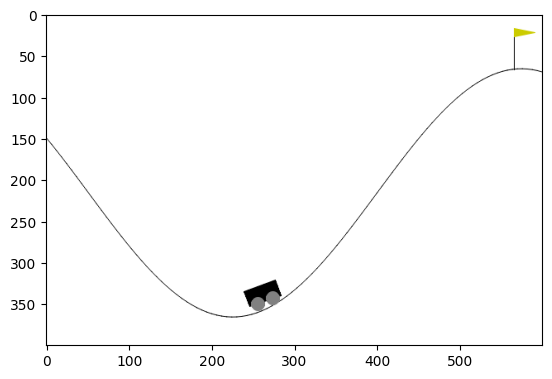

In [5]:
env_screen = env.render()
plt.imshow(env_screen)

Complete code for a trail run

In [6]:
import time
import gym

env = gym.make('MountainCar-v0', render_mode='human')
num_steps = 100
obs = env.reset()
for step in range(num_steps):
    action = env.action_space.sample()
    obs, reward, done, terminated, info = env.step(action)

    env.render()
    time.sleep(0.001)

    if done:
        env.reset()

env.close()

/home/oneautumleaf/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Spaces

In [15]:
print(f"Upper Bound for Env Observation: {env.observation_space.high}")
print(f"Lower Bound for Env Observation: {env.observation_space.low}")

Upper Bound for Env Observation: [0.6  0.07]
Lower Bound for Env Observation: [-1.2  -0.07]


Wrappers

In [16]:
env = gym.make("BreakoutNoFrameskip-v4", render_mode='human')

print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")

obs = env.reset()

for i in range(100):
    action = env.action_space.sample()
    obs, reward, done, terminated, info = env.step(action)
    env.render()
    time.sleep(0.01)
    if done:
        env.reset()
env.close()

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Observation Space: Box(0, 255, (210, 160, 3), uint8)
Action Space: Discrete(4)


/home/oneautumleaf/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [19]:
from collections import deque
from gym import spaces
import numpy as np

class ConcatObs(gym.Wrapper):
    def __init__(self,env, k):
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shp = env.observation_space.shape
        self.observation_space = spaces.Box(low=0, high=255, shape=((k,) + shp), dtype=env.observation_space.dtype)
    
    def reset(self):
        ob, _ = self.env.reset()
        for _ in range(self.k):
            self.frames.append(ob)
        return self._get_ob()
    
    
    def step(self, action):
        ob, reward, done, terminated, info = self.env.step(action)
        self.frames.append(ob)
        return self._get_ob(), reward, done, terminated, info
    
    def _get_ob(self):
        return np.array(self.frames)

In [20]:
env = gym.make("BreakoutNoFrameskip-v4")
wrapped_env = ConcatObs(env, 4)
print(f"The new observation space is: {wrapped_env.observation_space}")

The new observation space is: Box(0, 255, (4, 210, 160, 3), uint8)


In [21]:
obs = wrapped_env.reset()
print(f"Initial obs is of the shape: {obs.shape})")

obs, _, _, _, _ = wrapped_env.step(2)
print(f"Obs after taking a step is {obs.shape}")

Initial obs is of the shape: (4, 210, 160, 3))
Obs after taking a step is (4, 210, 160, 3)


In [5]:
import random

class ObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)

    def observation(self, obs):
        return obs / 255.0

class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)

    def reward(self, reward):
        # Clip reward between 0 to 1
        return np.clip(reward, 0, 1)
    
class ActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)

    def action(self, action):
        if action == 3:
            return random.choice([0, 1, 2])
        else:
            return action

In [23]:
env = gym.make("BreakoutNoFrameskip-v4", render_mode='human')
wrapped_env = ObservationWrapper(RewardWrapper(ActionWrapper(env)))

obs = wrapped_env.reset()

for step in range(100):
    action = wrapped_env.action_space.sample()
    obs, reward, done, terminated, info = wrapped_env.step(action)

    if (obs > 1.0).any() or (obs < 0.0).any():
        print("Max and min value of observations out of range")

    if reward < 0.0 or reward > 1.0:
        assert False, "Reward out of bounds"

    wrapped_env.render()
    time.sleep(0.001)

wrapped_env.close()
print("All checks passed")

All checks passed


In [22]:
print(f"Wrapped env: {wrapped_env}")
print(f"Unwrapped env: {wrapped_env.unwrapped}")

Wrapped env: <ConcatObs<OrderEnforcing<PassiveEnvChecker<AtariEnv<BreakoutNoFrameskip-v4>>>>>
Unwrapped env: <AtariEnv<BreakoutNoFrameskip-v4>>


Documentation Lookup

In [15]:
help(env.reset)

Help on method reset in module gym.wrappers.order_enforcing:

reset(**kwargs) method of gym.wrappers.order_enforcing.OrderEnforcing instance
    Resets the environment with `kwargs`.



In [24]:
help(env.step)

Help on method step in module gym.wrappers.order_enforcing:

step(action) method of gym.wrappers.order_enforcing.OrderEnforcing instance
    Steps through the environment with `kwargs`.

